In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=16b3d812503876657c7f5aae7a89422e


In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

641

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kathu
Processing Record 2 of Set 1 | bud
Processing Record 3 of Set 1 | port hardy
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | puerto el triunfo
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | bereda
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | lonavale
Processing Record 10 of Set 1 | eskasem
City not found. Skipping...
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | marang
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | kuybyshevo
Processing Record 16 of Set 1 | klaksvik
Processing Record 17 of Set 1 | amderma
City not found. Skipping...
Processing Record 18 of Set 1 | oksfjord
Processing Record 19 of Set 1 | mount gambier
Processing Record 20 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 21 of Set 1 | sumbe
Pr

Processing Record 41 of Set 4 | caravelas
Processing Record 42 of Set 4 | wulanhaote
City not found. Skipping...
Processing Record 43 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 44 of Set 4 | cedar lake
Processing Record 45 of Set 4 | pisco
Processing Record 46 of Set 4 | grindavik
Processing Record 47 of Set 4 | sao gabriel da cachoeira
Processing Record 48 of Set 4 | belmonte
Processing Record 49 of Set 4 | rudiskes
Processing Record 50 of Set 4 | muli
Processing Record 1 of Set 5 | nantucket
Processing Record 2 of Set 5 | teguise
Processing Record 3 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 5 | blitar
Processing Record 5 of Set 5 | lhokseumawe
Processing Record 6 of Set 5 | powell river
Processing Record 7 of Set 5 | mehamn
Processing Record 8 of Set 5 | sitka
Processing Record 9 of Set 5 | haukipudas
Processing Record 10 of Set 5 | tabou
Processing Record 11 of Set 5 | nizwa
Processing Record 12 of Set 5 | hwange
Pro

Processing Record 31 of Set 8 | acapulco
Processing Record 32 of Set 8 | nara
Processing Record 33 of Set 8 | bay roberts
Processing Record 34 of Set 8 | tromso
Processing Record 35 of Set 8 | nanortalik
Processing Record 36 of Set 8 | casino
Processing Record 37 of Set 8 | manzhouli
Processing Record 38 of Set 8 | sao joao da barra
Processing Record 39 of Set 8 | hofn
Processing Record 40 of Set 8 | pompeu
Processing Record 41 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 42 of Set 8 | great falls
Processing Record 43 of Set 8 | bonoua
Processing Record 44 of Set 8 | okhotsk
Processing Record 45 of Set 8 | mundo nuevo
Processing Record 46 of Set 8 | killybegs
Processing Record 47 of Set 8 | puerto ayacucho
Processing Record 48 of Set 8 | lolua
City not found. Skipping...
Processing Record 49 of Set 8 | dunedin
Processing Record 50 of Set 8 | omboue
Processing Record 1 of Set 9 | hokitika
Processing Record 2 of Set 9 | kirovskiy
Processing Record 3 of Set 9 | alice

Processing Record 20 of Set 12 | salta
Processing Record 21 of Set 12 | oxbow
Processing Record 22 of Set 12 | koroni
Processing Record 23 of Set 12 | sioux lookout
Processing Record 24 of Set 12 | palmer
Processing Record 25 of Set 12 | borogontsy
Processing Record 26 of Set 12 | sangin
Processing Record 27 of Set 12 | macas
Processing Record 28 of Set 12 | alugan
Processing Record 29 of Set 12 | skibbereen
Processing Record 30 of Set 12 | rabaul
Processing Record 31 of Set 12 | dandong
Processing Record 32 of Set 12 | meyungs
City not found. Skipping...
Processing Record 33 of Set 12 | salinopolis
Processing Record 34 of Set 12 | owando
Processing Record 35 of Set 12 | eureka
Processing Record 36 of Set 12 | ahipara
Processing Record 37 of Set 12 | tomatlan
Processing Record 38 of Set 12 | berlevag
Processing Record 39 of Set 12 | black river
Processing Record 40 of Set 12 | den helder
Processing Record 41 of Set 12 | kahului
Processing Record 42 of Set 12 | flinders
Processing Recor

In [16]:
# Print the city count to confirm sufficient count.
len(city_data)

595

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kathu,7.92,98.33,86.00,58,20,9.17,TH,2020-02-20 04:40:02
1,Bud,39.45,-86.18,33.01,63,90,8.05,US,2020-02-20 04:40:02
2,Port Hardy,50.70,-127.42,32.00,57,75,3.36,CA,2020-02-20 04:40:02
3,Busselton,-33.65,115.33,91.99,17,0,2.68,AU,2020-02-20 04:40:02
4,Puerto El Triunfo,13.28,-88.55,82.40,83,0,4.70,SV,2020-02-20 04:40:03
5,Hermanus,-34.42,19.23,66.00,93,85,5.99,ZA,2020-02-20 04:40:03
6,Bereda,43.27,-7.54,45.00,100,20,6.93,ES,2020-02-20 04:40:03
7,Port Alfred,-33.59,26.89,73.00,91,37,7.67,ZA,2020-02-20 04:40:03
8,Lonavale,18.75,73.42,89.01,51,67,3.36,IN,2020-02-20 04:40:04
9,Ushuaia,-54.80,-68.30,46.40,93,90,24.16,AR,2020-02-20 04:38:08


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kathu,TH,2020-02-20 04:40:02,7.92,98.33,86.00,58,20,9.17
1,Bud,US,2020-02-20 04:40:02,39.45,-86.18,33.01,63,90,8.05
2,Port Hardy,CA,2020-02-20 04:40:02,50.70,-127.42,32.00,57,75,3.36
3,Busselton,AU,2020-02-20 04:40:02,-33.65,115.33,91.99,17,0,2.68
4,Puerto El Triunfo,SV,2020-02-20 04:40:03,13.28,-88.55,82.40,83,0,4.70
5,Hermanus,ZA,2020-02-20 04:40:03,-34.42,19.23,66.00,93,85,5.99
6,Bereda,ES,2020-02-20 04:40:03,43.27,-7.54,45.00,100,20,6.93
7,Port Alfred,ZA,2020-02-20 04:40:03,-33.59,26.89,73.00,91,37,7.67
8,Lonavale,IN,2020-02-20 04:40:04,18.75,73.42,89.01,51,67,3.36
9,Ushuaia,AR,2020-02-20 04:38:08,-54.80,-68.30,46.40,93,90,24.16


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [26]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1582175701.8130782

In [27]:
today = time.strftime("%x")
today

'02/19/20'

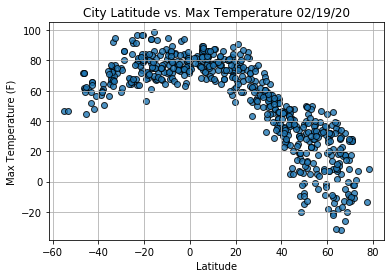

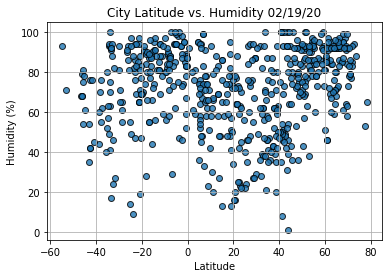

In [29]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

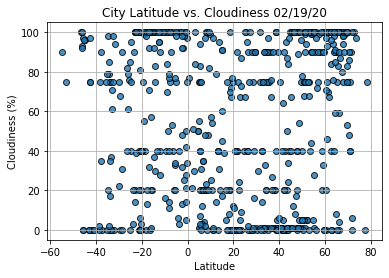

In [30]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

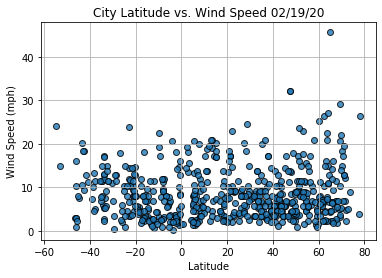

In [31]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()